# Introduction
Unsupervised machine learning algorithm digunakan untuk mengelompokkan data tidak terstruktur menurut kesamaan dan pola yang berbeda dalam kumpulan data.

Unsupervised algorithm berfungsi dengan data tak berlabel. Tujuannya adalah eksplorasi

Unsupervised machine learning algorithm digunakan untuk:

* explore struktur informasi;
* extract wawasan berharga;
* detect pola;
* implement kedalam operasinya untuk meningkatkan efisiensi.

Pengelompokan meliputi:

* Defining the credentials yang membentuk kebutuhan untuk setiap cluster. Kredensial kemudian dicocokkan dengan data yang diproses dan dengan demikian cluster terbentuk.
* Breaking down dataset ke dalam kelompok tertentu (dikenal sebagai cluster) berdasarkan fitur umum mereka.

# Principal Component Analysis
Principal Component Analysis (PCA) adalah teknik linear dimensionality reduction yang dapat digunakan untuk mengekstraksi informasi dari ruang dimensi tinggi dengan memproyeksikannya ke dalam sub-ruang berdimensi lebih rendah. PCA mencoba untuk mempertahankan bagian penting yang memiliki lebih banyak variasi data dan menghapus bagian yang tidak penting dengan variasi yang lebih sedikit.

Menurut Wikipedia, PCA adalah statistical procedure yang menggunakan orthogonal transformation untuk mengubah serangkaian observasi variabel yang mungkin berkorelasi (entitas yang masing-masing mengambil berbagai nilai numerik) menjadi satu set nilai variabel yang tidak berkorelasi linier yang disebut principal components.

## But where all you can apply PCA?
### Data Visualization:
PCA memproyeksikan data ke dimensi yang lebih rendah, sehingga memungkinkan kita untuk memvisualisasikan data dalam ruang 2D atau 3D dengan mata telanjang

### Speeding Machine Learning (ML) Algorithm:
Karena ide utama PCA adalah pengurangan dimensi/dimensionality reduction, kita dapat memanfaatkannya untuk mempercepat waktu pelatihan dan pengujian algoritma machine learning

## How PCA works
### Mean Centering
mean-centering melibatkan pengurangan rata-rata variabel dari data.

## The first principal component
Principal component pertama (PC1) adalah garis yang paling sesuai untuk point swarm. PC1 mewakili maximum variance direction dalam data. Setiap pengamatan (titik kuning) dapat diproyeksikan ke garis ini untuk mendapatkan nilai koordinat di sepanjang PC-line. Nilai ini dikenal sebagai score.

## The second principal component
Principal component kedua (PC2) diorientasikan sedemikian rupa sehingga mencerminkan sumber variasi terbesar kedua dalam data, sementara ortogonal terhadap PC pertama. PC2 juga melewati titik rata-rata.

## Two principal components define a model plane
Dua PC membentuk plane. Bidang ini merupakan window ke dalam ruang multidimensi, yang dapat divisualisasikan secara grafis. Setiap pengamatan dapat diproyeksikan ke bidang ini, memberikan skor untuk masing-masing.

## PCA with Python
### Data Exploration

In [62]:
# menggunakan modul dataset sklearn dan mengimpor dataset Breast Cancer darinya.
from sklearn.datasets import load_breast_cancer

In [63]:
breast = load_breast_cancer()

In [64]:
breast_data = breast.data

In [65]:
breast_data.shape

(569, 30)

In [66]:
# Meskipun kita tidak membutuhkan label tetapi tetap untuk pemahaman yang lebih baik, mari muat label dan periksa bentuknya.
breast_label = breast.target

In [67]:
breast_label.shape

(569,)

In [68]:
#mengimpor numpy karena kita akan membentuk kembali breast_labels 
# untuk digabungkan dengan breast_data sehingga kita akhirnya bisa 
# membuat DataFrame yang akan memiliki data dan label.

import numpy as np

In [69]:
labels = np.reshape(breast_label,(569,1))

In [70]:
# concatenate data dan label di sepanjang second axis, yang berarti bentuk 
# akhir dari array akan menjadi 569 x 31.

final_breast_data = np.concatenate([breast_data, labels], axis=1)

In [71]:
final_breast_data.shape

(569, 31)

In [72]:
# mengimpor pandas untuk membuat DataFrame dari data akhir untuk 
# merepresentasikan data secara tabular.

import pandas as pd

In [73]:
breast_dataset = pd.DataFrame(final_breast_data)

In [74]:
# Print the features
features = breast.feature_names

In [75]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [76]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [77]:
# menambahkannya secara manual ke array fitur karena kita akan 
# menyamakan array ini dengan nama kolom dari dataframe breast_dataset kita.

features_labels = np.append(features, 'label')

In [78]:
# menyematkan nama kolom ke dataframe breast_dataset.
breast_dataset.columns = features_labels

In [79]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [80]:
# mengubah label menjadi benign dan malignant menggunakan fungsi .replace. 
# Kita akan menggunakan inplace = True yang akan memodifikasi dataframe 
# breast_dataset.

breast_dataset['label'].replace(0, 'Beningn', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [81]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Beningn
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Beningn
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Beningn
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Beningn
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


# Data Visualization using PCA
### Visualizing the Breast Cancer Data
mengimpor modul StandardScaler dari sklearn library dan hanya memilih fitur dari breast_dataset yang kita buat di langkah Eksplorasi Data. Setelah kita memiliki fiturnya, kita kemudian akan menerapkan scaling dengan melakukan fit_transform pada data fitur.

In [82]:
# Saat menerapkan StandardScaler, setiap fitur data kita harus didistribusikan 
# secara normal sehingga akan menskalakan distribusi ke rata-rata nol dan 
# deviasi standar satu.

from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # menormalisasi fitur

In [83]:
x.shape

(569, 30)

In [84]:
# ubah fitur yang dinormalisasi menjadi format tabel dengan bantuan DataFrame.

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x, columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


menggunakan pustaka sklearn untuk mengimpor modul PCA, dan dalam metode PCA, kita akan mengirimkan jumlah komponen (n_components = 2) dan terakhir memanggil fit_transform pada data agregat.

In [85]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [86]:
principal_breast_Df = pd.DataFrame(data=principalComponents_breast, 
                                   columns=['principal component 1', 'principal component 2'])

In [87]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Setelah kita memiliki principal components, kita dapat menemukan explained_variance_ratio. Ini akan memberi kita jumlah informasi atau varians yang dimiliki setiap principal component setelah memproyeksikan data ke subruang dimensi yang lebih rendah.

In [88]:
print("Explained variation per principal component: {}"
     .format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


principal component 1 menampung 44,2% informasi sedangkan principal component 2 hanya menampung 19% informasi. Juga, hal lain yang perlu diperhatikan adalah saat memproyeksikan data tiga puluh dimensi menjadi data dua dimensi, 36,8% informasi hilang.

visualisasi dari 569 sampel di sepanjang sumbu principal component - 1 dan principal component - 2

<Figure size 432x288 with 0 Axes>

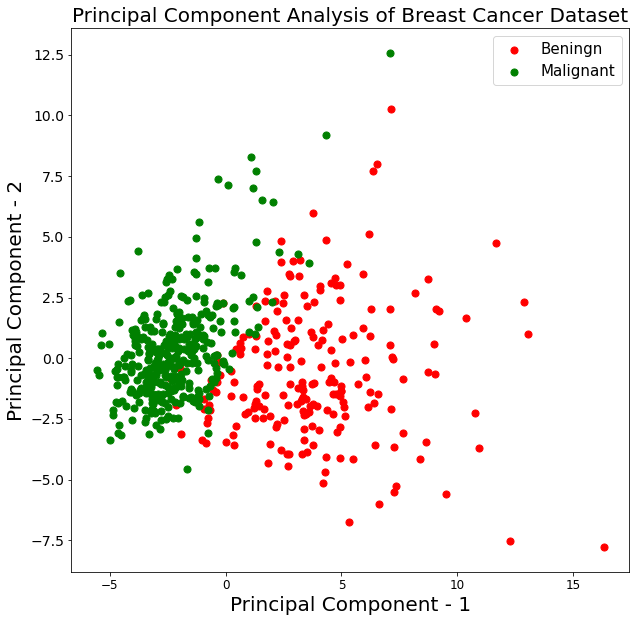

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Principal Component - 1", fontsize=20)
plt.ylabel("Principal Component - 2", fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)
targets = ['Beningn', 'Malignant']
colors = ['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1'],
               principal_breast_Df.loc[indicesToKeep, 'principal component 2'],
               c = color, s=50)
plt.legend(targets, prop={'size':15})
plt.show()

Dari grafik di atas, kita dapat mengamati bahwa dua kelas benign dan malignant, ketika diproyeksikan ke ruang dua dimensi, dapat dipisahkan secara linier sampai batas tertentu. Pengamatan lain dapat berupa penyebaran kelas benign dibandingkan dengan kelas malignant.

# K-Means Clustering
Clustering adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam kluster yang sama lebih mirip satu sama lain daripada objek di kluster lain.

## How is Clustering an Unsupervised Learning Problem?
Such problems, without any fixed target variable, are known as unsupervised learning problems. In these problems, we only have the independent variables and no target/dependent variable.

## Properties of Clusters
### Property 1
Semua titik data dalam sebuah cluster harus serupa satu sama lain

### Property 2
Titik data dari cluster yang berbeda harus seberbeda mungkin.

## Understanding the Different Evaluation Metrics for Clustering
Memvisualisasikan semua fitur ini bersama-sama dan memutuskan cluster yang lebih baik dan bermakna tidak akan mungkin bagi kita. Di sinilah kita dapat menggunakan evaluation metrics. Mari kita bahas beberapa di antaranya dan pahami bagaimana kita dapat menggunakannya untuk mengevaluasi kualitas cluster kita

### Inertia
Inersia sebenarnya menghitung jumlah jarak semua titik dalam sebuah cluster dari pusat cluster tersebut. Jarak dalam cluster ini dikenal sebagai intracluster distance. Jadi, inersia memberi kita sum of intracluster distances. jarak di antara mereka harus serendah mungkin. tujuan kita di sini adalah meminimalkan jarak antara titik-titik dalam sebuah cluster

K-means adalah centroid-based algorithm, atau distance-based algorithm, dimana kita menghitung jarak untuk menetapkan titik ke sebuah cluster. Di K-Means, setiap cluster dikaitkan dengan centroid

Langkah-Langkah K-Means:

* Langkah 1: Pilih jumlah cluster k
* Langkah 2: Pilih k titik acak dari data sebagai centroids
* Langkah 3: Tetapkan semua titik ke centroid cluster terdekat
* Langkah 4: Hitung ulang centroid dari cluster yang baru terbentuk
* Langkah 5: Ulangi langkah 3 dan 4

## Stopping Criteria for K-Means Clustering
Pada dasarnya ada tiga kriteria penghentian yang dapat diadopsi untuk menghentikan algoritma K-means:

* Centroid dari cluster yang baru terbentuk tidak berubah
* Poin tetap di cluster yang sama
* Jumlah maksimum iterasi tercapai

Aplikasi K-Means di dunia nyata meliputi:

* customer profiling
* market segmentation
* computer vision
* search engines
* astronomy

# How to Choose the Right Number of Clusters in K-Means Clustering?
Jumlah cluster maksimum yang mungkin akan sama dengan jumlah observasi dalam dataset.

Satu hal yang dapat kita lakukan adalah memplot grafik, juga dikenal sebagai elbow curve, di mana sumbu x akan mewakili jumlah cluster dan sumbu y akan menjadi metrik evaluasi.

**nilai cluster dimana penurunan nilai inersia ini menjadi konstan dapat dipilih sebagai nilai cluster yang tepat untuk data kita.**

Kita juga harus melihat computation cost sambil menentukan jumlah cluster. Jika kita menambah jumlah cluster, maka computation cost juga akan meningkat. Jadi, jika kita tidak memiliki sumber daya komputasi yang tinggi, disarankan untuk memilih jumlah cluster yang lebih sedikit.

# K-Means with Python

In [90]:
from sklearn.cluster import KMeans

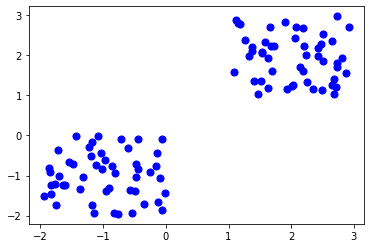

In [91]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100,:] = X1

plt.scatter(X[:,0], X[:,1], s=50, c='b')
plt.show()

c:\Users\Agung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


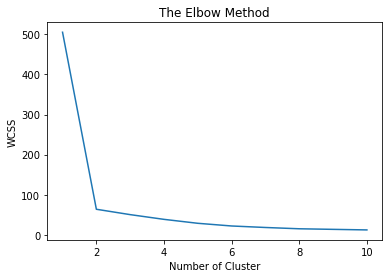

In [92]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS") # Within Cluster Sum of Squares
plt.show()

In [93]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [94]:
Kmean.cluster_centers_

array([[ 2.02972362,  1.93942912],
       [-0.97833018, -0.99589315]])

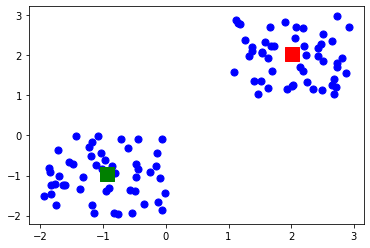

In [95]:
plt.scatter(X[:,0], X[:,1], s=50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

## Menggunakan Dataset

In [96]:
# Pertama-tama akan mengimpor perpustakaan yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [97]:
# membaca data dan melihat lima baris pertama
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [98]:
# lihat beberapa statistik yang terkait dengan data:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Karena K-Means adalah algoritme berbasis jarak/distance-based algorithm, perbedaan magnitude ini dapat menimbulkan masalah. Jadi, pertama-tama mari kita bawa semua variabel ke magnitude yang sama:

In [99]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistik of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [100]:
# mari kita buat fungsi kmeans dan berlatih dengan data
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k-means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [101]:
# evaluasi seberapa baik cluster yang terbentuk. Untuk melakukan itu, 
# kita akan menghitung inersia dari cluster

kmeans.inertia_

2599.3873849123083

Pertama-tama kita akan melatih beberapa model k-means dan di setiap model yang berurutan, kita akan menambah jumlah cluster. Kita akan menyimpan nilai inersia dari setiap model dan kemudian memplotnya untuk memvisualisasikan hasilnya

c:\Users\Agung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

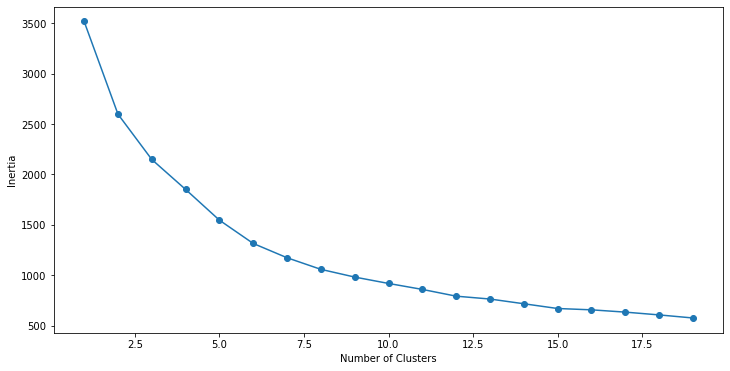

In [103]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the result into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

Melihat kurva siku di atas, kita dapat memilih sejumlah cluster antara 5 hingga 8. Mari kita atur jumlah cluster menjadi 6 dan praktikkan modelnya:

In [106]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [107]:
# lihat jumlah nilai poin di setiap cluster yang dibentuk di atas
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    179
2    125
3     87
0     38
5     10
4      1
Name: cluster, dtype: int64

## Save and Load Models
### Finalize Your Model with Pickle
Pickle adalah cara standar untuk membuat serialisasi objek dengan Python. Nantinya kita dapat memuat file ini untuk deserialize model dan menggunakannya untuk membuat prediksi baru.

In [108]:
import pickle

# Assigning features and label variables 
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy'] 
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'] 
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# Import LabelEncoder 
from sklearn import preprocessing 

#creating labelEncoder 
le = preprocessing.LabelEncoder()

# Converting string labels into numbers. 
weather_encoded=le.fit_transform(weather) 

# Converting string labels into numbers 
temp_encoded=le.fit_transform(temp) 
label=le.fit_transform(play)

#Combinig weather and temp into single listof tuples 
features=list(zip(weather_encoded,temp_encoded)) 

#Import Gaussian Naive Bayes model 
from sklearn.naive_bayes import GaussianNB 

#Create a Gaussian Classifier 
model = GaussianNB() 

# Train the model using the training sets 
model.fit(features,label) 

# save the model to disk import pickle 
filename = 'finalized_model.sav' 
pickle.dump(model, open(filename, 'wb'))

In [109]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

In [110]:
loaded_model.predict([[0,2]])

array([1], dtype=int64)

# Tips for Finalizing Your Model
* Python Version
* Library Versions
* Manual Serialization
Harus sama. Catat versinya sehingga kita dapat re-create lingkungan jika karena alasan tertentu kita tidak dapat memuat ulang model kita di komputer lain atau platform lain di lain waktu.